<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Cifar10_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification Project**

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.datasets import cifar10, cifar100
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import time

In [2]:
# 2. Load dữ liệu cifar
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

170508288/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


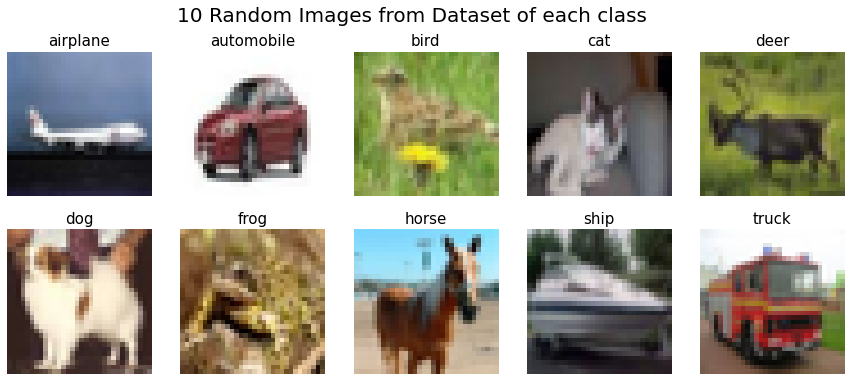

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx][0] not in d.keys():
          d[y_train[idx][0]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

In [4]:
# 4. prepare data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                  

In [14]:
# 6. train model
start_time = time.time()
H = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=25, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/25
1250/1250 [==============================] - 11s 8ms/step - loss: 1.5737 - accuracy: 0.4383 - val_loss: 1.3141 - val_accuracy: 0.5394
Epoch 2/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1218 - accuracy: 0.6033 - val_loss: 0.9121 - val_accuracy: 0.6751
Epoch 3/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9416 - accuracy: 0.6679 - val_loss: 0.8231 - val_accuracy: 0.7120
Epoch 4/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8493 - accuracy: 0.7018 - val_loss: 0.7651 - val_accuracy: 0.7300
Epoch 5/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7863 - accuracy: 0.7240 - val_loss: 0.7651 - val_accuracy: 0.7255
Epoch 6/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7330 - accuracy: 0.7442 - val_loss: 0.6332 - val_accuracy: 0.7754
Epoch 7/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6931 - accuracy: 0.7582 - val_loss: 0.6265 - val_ac

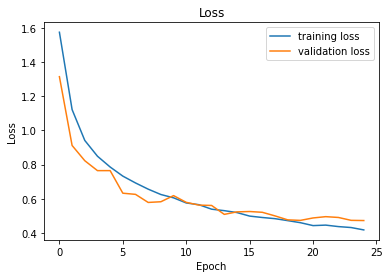

In [15]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 25
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

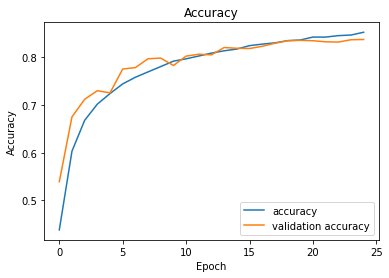

In [16]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 25
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [17]:
# 9.Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 4ms/step - loss: 0.4834 - accuracy: 0.8378
[loss, accuracy]:  [0.483369380235672, 0.8378000259399414]
Running time: 1.57 (s)


[[3.1871856e-05 6.0001444e-02 6.3296703e-08 1.2459850e-07 1.3503278e-08
  5.5610792e-09 5.9975228e-08 2.3352884e-09 9.3953067e-01 4.3578769e-04]]
[8] 8
Giá trị dự đoán:  ship


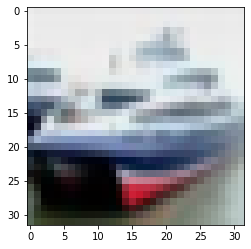

In [22]:
# 10.predict
id =1
plt.imshow(X_test[id])

y_predict = model.predict(X_test[id].reshape(1, 32, 32, 3))
print(y_predict)
y_predict = np.argmax(y_predict)
print(y_test[id], y_predict)
print('Giá trị dự đoán: ', label[y_predict])